Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


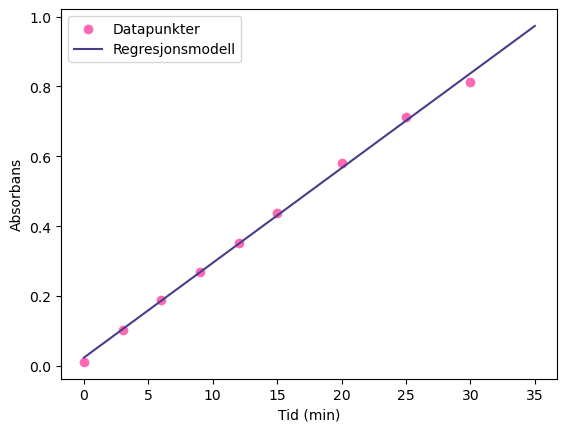

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

data = pd.read_csv("Absorbans_tid.csv")

tid = data["tid"]
absorbans = data["absorbans"]

# Definerer formen på regresjonsmodellen
def modell(x, a, b):
    return a*x + b

koeff, covar = opt.curve_fit(modell, tid, absorbans)
# Finn a og b her
V0 = koeff[0]
I = koeff[1]

# Beregner funksjonsverdier til den lineære tilpasningen
t = np.linspace(0,35,100) # Nye t-verdier å plotte med
y = V0*t + I               # Regresjonsmodellens y-verdier

# Plott funksjonen her
plt.scatter(tid, absorbans, color = "hotpink", label = "Datapunkter")
plt.plot(t, y, color = "darkslateblue", label = "Regresjonsmodell")
plt.xlabel("Tid (min)")
plt.ylabel("Absorbans")
plt.legend()
plt.show()

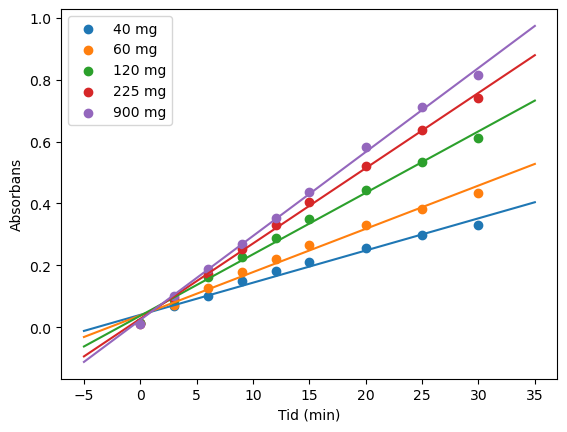

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

dataliste = ['S40.csv' ,'S60.csv' ,'S120.csv' ,'S225.csv' , 'S900.csv']
S = [40,60,120,225,900] # Substratkonsentrasjoner i mikrogram/L

# Definerer formen på regresjonsmodellen
def modell(x, a, b):
    return a*x + b

t = np.linspace(-5,35,100) # Nye x-verdier å plotte med
V = [] # Initialhastigheter

for i in range(len(dataliste)):
    data = pd.read_csv(dataliste[i]) # Leser fila
    koeff, covar = opt.curve_fit(modell, data["tid"], data["absorbans"])
    V0 = koeff[0]
    I = koeff[1]
    y = V0*t + I               # Regresjonsmodellens y-verdier
    plt.scatter(data["tid"], data["absorbans"], label = str(S[i])+" mg")
    plt.plot(t, y)
    plt.xlabel("Tid (min)")
    plt.ylabel("Absorbans")
    V.append(V0) #legger til funnet initialhastighet til liste

# plt.savefig("initialhastigheter.png")
plt.legend()
plt.show()

# Lagrer dataene i en dataframe og skriver dem til en csv-fil
d = {"Hastighet": V, "Substratkonsentrasjon": S}
df = pd.DataFrame(d)
df.to_csv("Reaksjonshastigheter_test.csv", index = False)

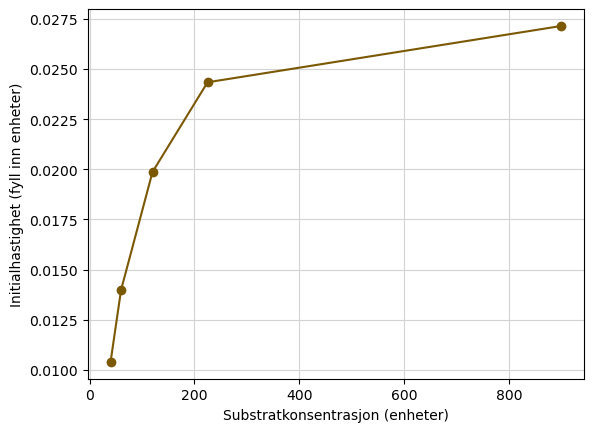

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data2 = pd.read_csv('Reaksjonshastigheter_test.csv')
V = data2["Hastighet"]
S = data2["Substratkonsentrasjon"]

plt.plot(S, V, marker = "o", color = "xkcd:shit brown")
plt.ylabel('Initialhastighet (fyll inn enheter)')
plt.xlabel("Substratkonsentrasjon (enheter)")
plt.grid(color='lightgrey')
plt.show()

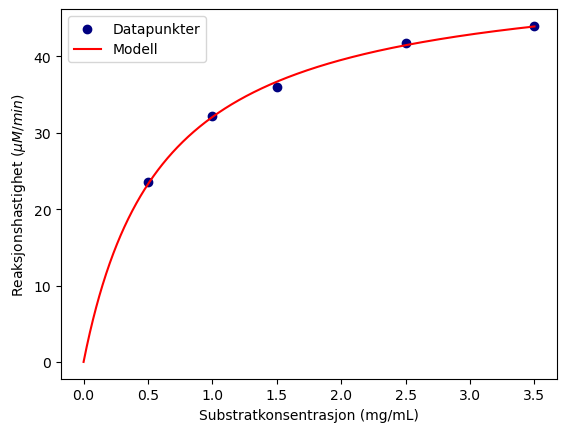

In [4]:
import scipy.optimize as opt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data2 = pd.read_csv('Reaksjonshastigheter.csv')
V = data2["V"]
S = data2["S"]

def michaelis_menten(x, Vmax, Km):
    return Vmax*x/(Km + x)

parametre, kovarians = opt.curve_fit(michaelis_menten, S, V)
Vmax = parametre[0]
Km = parametre[1]

x_ny = np.linspace(0, max(S), 1000)
y_model = michaelis_menten(x_ny, Vmax, Km)

plt.scatter(S, V, marker = "o", color = "navy", label="Datapunkter")
plt.plot( x_ny, y_model, "r-", label="Modell")
plt.ylabel('Reaksjonshastighet ($\mu M/min$)')
plt.xlabel("Substratkonsentrasjon (mg/mL)")
plt.legend()
plt.savefig("reaksjonsrate.tiff", dpi=500)

stigningstall= 0.011531627249160294 
 V_maks= 51.09989832956896 
 MM-konstant = 0.589264980006578


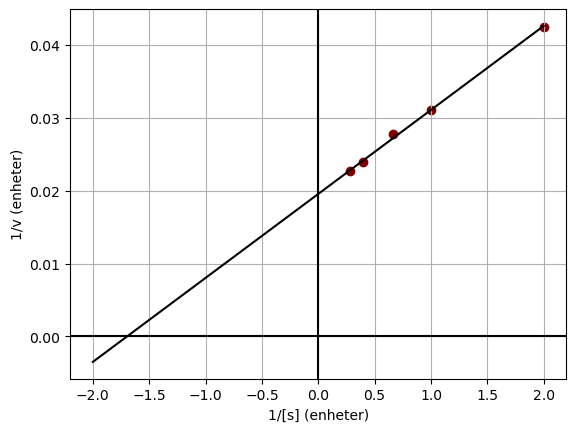

In [5]:
S_invers = 1/S
V_invers = 1/V

def modell(x, a, b):
    return a*x + b

koeffisienter, kovarians = opt.curve_fit(modell, S_invers, V_invers)
Km_vmaks = koeffisienter[0]
vmaks_invers = koeffisienter[1]

vmaks_LB = 1/vmaks_invers
km_LB = Km_vmaks*vmaks_LB

print('stigningstall=', Km_vmaks, '\n','V_maks=', vmaks_LB, '\n','MM-konstant =', km_LB)

x_ny = np.linspace(-max(S_invers), max(S_invers), 1000)
y_modell = Km_vmaks*x_ny + vmaks_invers

plt.scatter(S_invers, V_invers, color = "maroon")
plt.plot(x_ny, y_modell, color = "black")
plt.ylabel("1/v (enheter)")
plt.xlabel("1/[s] (enheter)")
plt.axhline(0,color='black')
plt.axvline(0, color='black')
plt.grid()
plt.show()

In [6]:
km_LB

0.589264980006578

In [7]:
Km

0.607068096755897

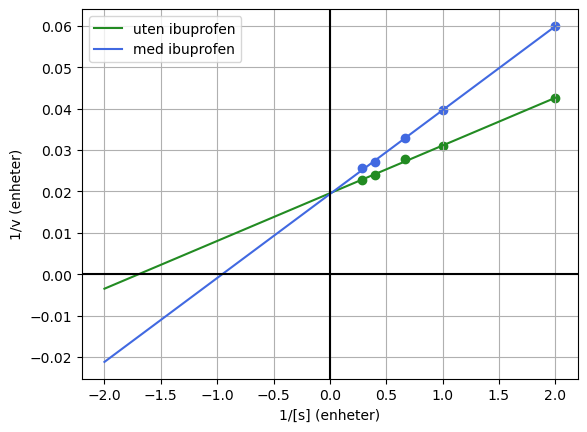

In [8]:
import pandas as pd

def Lineweaver_Burk(filnavn, farge, navn):
    """
    Funksjon som lager et Lineweaver-Burk-plott fra en datafil med
    reaksjonsfart i første kolonne og substratkonsentrasjon i andre kolonne.
    
    Parametre
    ---------
    filnavn: .txt- eller .csv-fil som inneholder reaksjonsfarten V og substratkonsentrasjonen S
    farge: ønsket farge på datapunktene og den tilpassede kurven.
    navn: merkelapper (labels) for kurven.
    
    Returnerer
    ----------
    vmaks: Maks reaksjonsfart
    km: Michaelis-Menten-konstanten
    """
    data = pd.read_csv(filnavn)
    V = data.iloc[:, 0] # Velger alle radverdier i første kolonne
    S = data.iloc[:, 1] # Velger alle radverdier i andre kolonne
    V_invers = 1/V
    S_invers = 1/S
    
    def modell(x, a, b):
        return a*x + b
    
    koeffisienter, kovarians = opt.curve_fit(modell, S_invers, V_invers)
    Km_vmaks = koeffisienter[0]
    vmaks_invers = koeffisienter[1]
    
    vmaks = 1/vmaks_invers
    km = Km_vmaks*vmaks
    
    x_ny = np.linspace(-max(S_invers), max(S_invers), 100)
    y_modell = Km_vmaks*x_ny + vmaks_invers

    plt.scatter(S_invers, V_invers, color = farge)
    plt.plot(x_ny, y_modell, color = farge, label = navn)
    return vmaks, km

vmaks_original, km_original = Lineweaver_Burk("Reaksjonshastigheter.csv", "forestgreen", "uten ibuprofen")
vmaks_ibux, km_ibux = Lineweaver_Burk("Reaksjonshastigheter_ibuprofen.csv", "royalblue", "med ibuprofen")
plt.ylabel("1/v (enheter)")
plt.xlabel("1/[s] (enheter)")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid()
plt.legend()
plt.show()

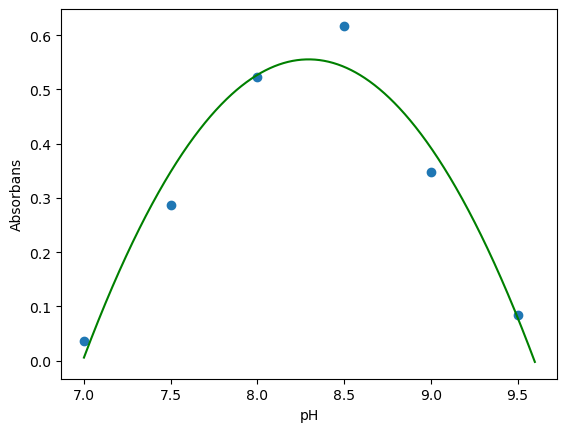

In [9]:
A = [0.036, 0.287, 0.5225, 0.617, 0.347, 0.085]
pH = [7, 7.5, 8, 8.5, 9, 9.5]

a,b,c=np.polyfit(pH, A, 2)
x = np.linspace(7,9.6,1000)
y = a*x**2 + b*x + c


plt.scatter(pH,A)
plt.plot(x,y, color="green")
plt.xlabel("pH")
plt.ylabel("Absorbans")
plt.savefig("abs_ph.tiff", dpi=500)